# News Trends

In [71]:
import requests
from matplotlib import rc
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [22]:
from config import * # config안의 정보 가져오기

In [23]:
url = f"{ELASTIC_SEARCH_URL}/news/_search"

In [55]:
def get_news_trends (publisher):
    query = """
    {
        "size": 0,
        "aggs": {
            "group_by_publisher": {
                "terms": {
                    "field": "publisher.keyword"
                }
            }
        }
    }    
    """

    headers = {
        'Content-Type': 'application/json'
    }

    resp = requests.get(
       url,
        data=query,
        headers=headers,
        auth = ELASTIC_SEARCH_AUTH
    )

    data = resp.json()

    return data

In [72]:
tmp = pd.DataFrame(get_news_trends('d')['aggregations']['group_by_publisher']['buckets'])
tmp = tmp.set_index('key')
tmp

,doc_count
key,
연합뉴스,10787
뉴스1,10345
뉴시스,9557
이데일리,8860
파이낸셜뉴스,6469
아시아경제,5785
머니투데이,5676
서울경제,4695
한국경제,4644


<BarContainer object of 10 artists>

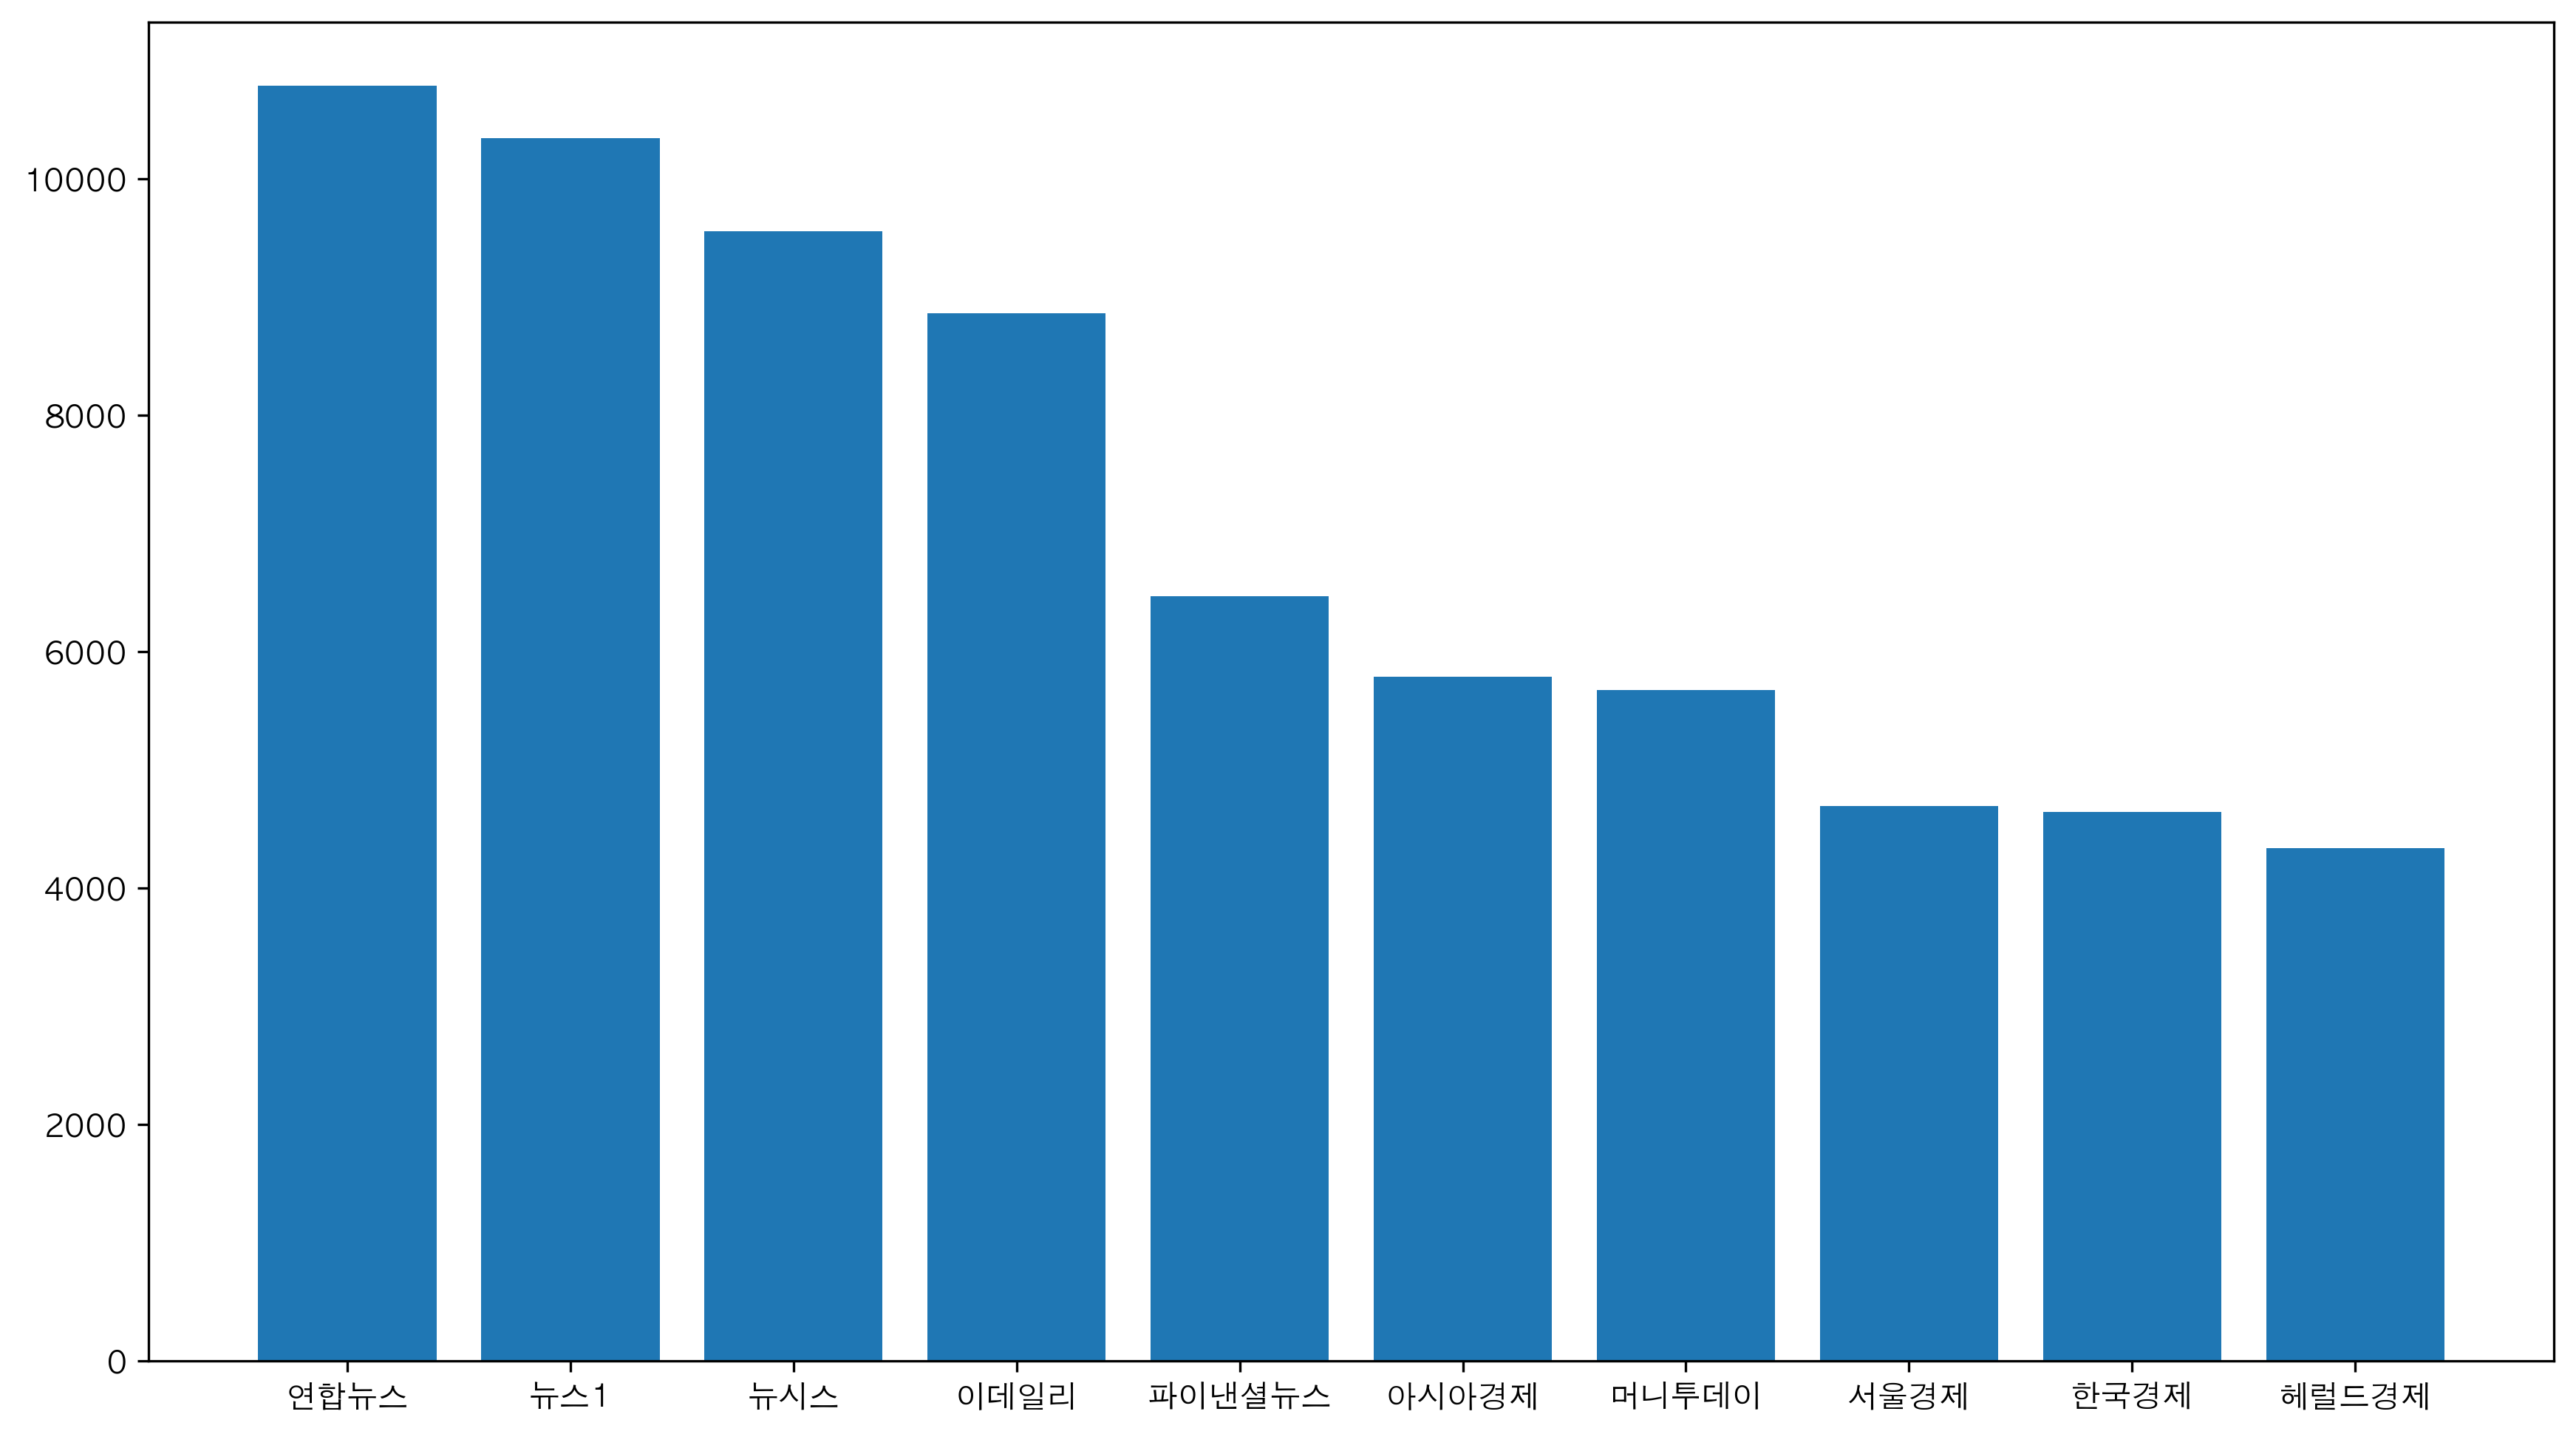

In [75]:
plt.figure(figsize=(14,8), dpi=300, facecolor='w')
plt.bar(tmp.index, tmp['doc_count'])


In [24]:
query = """
{
  "size": 0,
  "aggs": {
    "group_by_date": {
      "date_histogram": {
        "field": "created_at",
        "interval": "day"
      }
    }
  }
}
"""

In [25]:
headers = {
    'Content-Type': 'application/json'
}

In [26]:
resp = requests.get(
    url,
    data=query,
    headers=headers,
    auth = ELASTIC_SEARCH_AUTH
)

In [27]:
resp.status_code

200

In [28]:
data = resp.json()

In [32]:
trends = data['aggregations']['group_by_date']['buckets']

In [34]:
import datetime as dt

In [36]:
dates = [dt.datetime.fromisoformat(x['key_as_string'][:-1]) for x in trends]

In [39]:
dates[:5]

[datetime.datetime(2022, 4, 1, 0, 0),
 datetime.datetime(2022, 4, 2, 0, 0),
 datetime.datetime(2022, 4, 3, 0, 0),
 datetime.datetime(2022, 4, 4, 0, 0),
 datetime.datetime(2022, 4, 5, 0, 0)]

In [40]:
doc_counts = [x['doc_count'] for x in trends]

In [41]:
import matplotlib.pyplot as plt

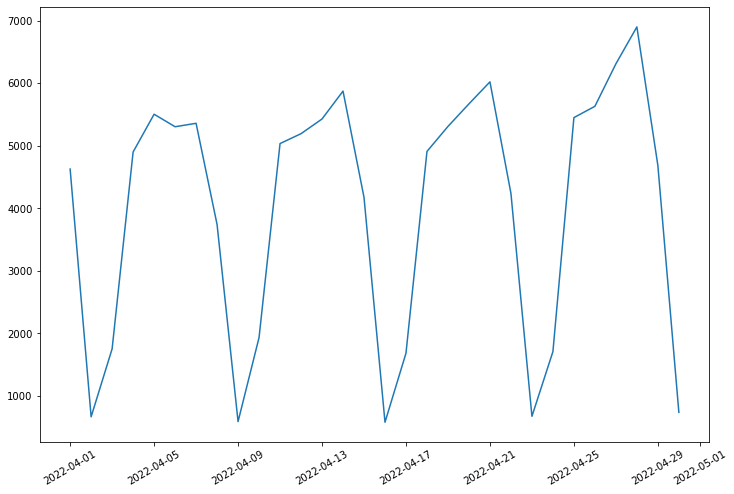

In [42]:
plt.figure(figsize=(12,8))
plt.plot(dates, doc_counts)
plt.xticks(rotation=30)
plt.show()

In [44]:
import pandas as pd

In [48]:
df = pd.DataFrame(data = trends)
df.head(3)

,key_as_string,key,doc_count
0,2022-04-01T00:00:00.000Z,1648771200000,4630
1,2022-04-02T00:00:00.000Z,1648857600000,667
2,2022-04-03T00:00:00.000Z,1648944000000,1754


In [49]:
df['date'] = pd.to_datetime(df['key_as_string'])

In [50]:
df = df.set_index('date')

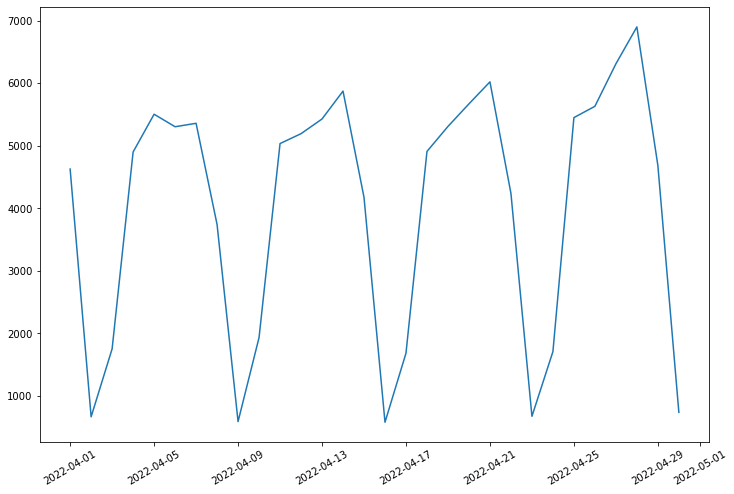

In [51]:
plt.figure(figsize=(12,8))
plt.plot(df['doc_count'])
plt.xticks(rotation=30)
plt.show()